# Stroke Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
d=pd.read_csv(r"C:\Users\User\Downloads\dataset.csv\dataset.csv")
d

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [3]:
d.shape

(43400, 12)

In [4]:
d.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [5]:
d.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
d.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
d.stroke.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [8]:
d1=d.drop(["id"],axis=1)
d1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


# Cleaning Process

In [9]:
d1.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [10]:
d1.bmi.value_counts()

27.7    271
27.6    267
26.8    266
26.1    265
27.1    260
       ... 
59.1      1
64.0      1
56.1      1
56.9      1
89.0      1
Name: bmi, Length: 555, dtype: int64

In [11]:
d1.smoking_status.value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [12]:
d1.bmi=d1.bmi.fillna(d1.bmi.median())
d1.smoking_status=d1.smoking_status.fillna("smokes")

In [13]:
d1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
d1.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [15]:
d1.ever_married.value_counts()

Yes    27938
No     15462
Name: ever_married, dtype: int64

In [16]:
d1.gender.value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [17]:
d1.work_type.value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

In [18]:
d1.Residence_type.value_counts()

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64

In [19]:
d1.smoking_status.value_counts()

smokes             19854
never smoked       16053
formerly smoked     7493
Name: smoking_status, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
d1.gender=le.fit_transform(d1.gender)
d1.ever_married=le.fit_transform(d1.ever_married)
d1.work_type=le.fit_transform(d1.work_type)
d1.Residence_type=le.fit_transform(d1.Residence_type)
d1.smoking_status=le.fit_transform(d1.smoking_status)

In [22]:
d1.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

# Model I

# Train Test Split

In [23]:
d1.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,2,0
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,0,8.0,0,0,0,2,1,110.89,17.6,2,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,1,14.0,0,0,0,1,0,161.28,19.1,2,0


In [24]:
x=d1.iloc[:,0:-1]
y=d1.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [27]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((34720, 10), (34720,), (8680, 10), (8680,))

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
lg.fit(x_train,y_train)

LogisticRegression()

In [30]:
p=lg.predict(x_test)

In [31]:
#confusion matrix
cf1=confusion_matrix(y_test,p)
cf1

array([[8530,    0],
       [ 150,    0]], dtype=int64)

In [32]:
#accuracy
ac1=cf1.diagonal().sum()/cf1.sum()*100
ac1

98.27188940092167

In [33]:
#report
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8530
           1       0.00      0.00      0.00       150

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.97      0.98      0.97      8680



In [34]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [35]:
Lg_f1=f1_score(y_test,p)
Lg_p1=precision_score(y_test,p)
Lg_r1=recall_score(y_test,p)
print(Lg_f1,Lg_p1,Lg_r1)

0.0 0.0 0.0


# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [37]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
pdt=dt.predict(x_test)

In [39]:
#confusion matrix
cf2=confusion_matrix(y_test,pdt)
cf2

array([[8343,  187],
       [ 144,    6]], dtype=int64)

In [40]:
#accuracy
ac2=cf2.diagonal().sum()/cf2.sum()*100
ac2

96.18663594470046

In [41]:
#report
print(classification_report(y_test,pdt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8530
           1       0.03      0.04      0.03       150

    accuracy                           0.96      8680
   macro avg       0.51      0.51      0.51      8680
weighted avg       0.97      0.96      0.96      8680



In [42]:
dt_f1=f1_score(y_test,pdt)
dt_p1=precision_score(y_test,pdt)
dt_r1=recall_score(y_test,pdt)
print(dt_f1,dt_p1,dt_r1)

0.034985422740524776 0.031088082901554404 0.04


# Random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [44]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
prf=rf.predict(x_test)

In [46]:
#confusion matrix
cf3=confusion_matrix(y_test,prf)
cf3

array([[8528,    2],
       [ 150,    0]], dtype=int64)

In [47]:
#accuracy
ac3=cf3.diagonal().sum()/cf3.sum()*100
ac3

98.24884792626727

In [48]:
print(classification_report(y_test,prf)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8530
           1       0.00      0.00      0.00       150

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.97      0.98      0.97      8680



In [49]:
rf_f1=f1_score(y_test,prf)
rf_p1=precision_score(y_test,prf)
rf_r1=recall_score(y_test,prf)
print(rf_f1,rf_p1,rf_r1)

0.0 0.0 0.0


# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [51]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [52]:
pknn=knn.predict(x_test)

In [53]:
#confusion matrix
cf4=confusion_matrix(y_test,pknn)
cf4

array([[8525,    5],
       [ 150,    0]], dtype=int64)

In [54]:
#accuracy
ac4=cf4.diagonal().sum()/cf4.sum()*100
ac4

98.21428571428571

In [55]:
print(classification_report(y_test,pknn))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8530
           1       0.00      0.00      0.00       150

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.97      0.98      0.97      8680



In [56]:
knn_f1=f1_score(y_test,pknn)
knn_p1=precision_score(y_test,pknn)
knn_r1=recall_score(y_test,pknn)
print(knn_f1,knn_p1,knn_r1)

0.0 0.0 0.0


# Adaboost

In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [58]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [59]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [60]:
#prediction
adbo_p=adbo.predict(x_test)
adbo_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
#confusion matrix
cf5=confusion_matrix(y_test,adbo_p)
cf5

array([[8348,  182],
       [ 143,    7]], dtype=int64)

In [62]:
#accuracy
ac5=cf5.diagonal().sum()/cf5.sum()*100
ac5

96.25576036866359

In [63]:
print(classification_report(y_test,adbo_p))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8530
           1       0.04      0.05      0.04       150

    accuracy                           0.96      8680
   macro avg       0.51      0.51      0.51      8680
weighted avg       0.97      0.96      0.96      8680



In [64]:
adbo_f1=f1_score(y_test,adbo_p)
adbo_p1=precision_score(y_test,adbo_p)
adbo_r1=recall_score(y_test,adbo_p)
print(adbo_f1,adbo_p1,adbo_r1)

0.04129793510324484 0.037037037037037035 0.04666666666666667


# XGBoost

In [65]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [66]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [67]:
xgb_p=xgb.predict(x_test)

In [68]:
cf6=confusion_matrix(y_test,xgb_p)
cf6

array([[8523,    7],
       [ 150,    0]], dtype=int64)

In [69]:
ac6=cf6.diagonal().sum()/cf6.sum()*100
ac6

98.19124423963133

In [70]:
print(classification_report(y_test,xgb_p))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8530
           1       0.00      0.00      0.00       150

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.97      0.98      0.97      8680



In [71]:
xgb_f1=f1_score(y_test,xgb_p)
xgb_p1=precision_score(y_test,xgb_p)
xgb_r1=recall_score(y_test,xgb_p)
print(xgb_f1,xgb_p1,xgb_r1)

0.0 0.0 0.0


# SVM

In [72]:
from sklearn.svm import SVC
svm=SVC()

In [73]:
svm.fit(x_train,y_train)

SVC()

In [74]:
s_p=svm.predict(x_test)

In [75]:
cf7=confusion_matrix(y_test,s_p)
cf7

array([[8530,    0],
       [ 150,    0]], dtype=int64)

In [76]:
ac7=cf7.diagonal().sum()/cf7.sum()*100
ac7

98.27188940092167

In [77]:
print(classification_report(y_test,s_p))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8530
           1       0.00      0.00      0.00       150

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.97      0.98      0.97      8680



In [78]:
sv_f1=f1_score(y_test,s_p)
sv_p1=precision_score(y_test,s_p)
sv_r1=recall_score(y_test,s_p)
print(sv_f1,sv_p1,sv_r1)

0.0 0.0 0.0


# Naive Bayes

In [79]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [80]:
nb.fit(x_train,y_train)

MultinomialNB()

In [81]:
nb_p=nb.predict(x_test)

In [82]:
cf8=confusion_matrix(y_test,nb_p)
cf8

array([[7407, 1123],
       [  84,   66]], dtype=int64)

In [83]:
ac8=cf8.diagonal().sum()/cf8.sum()*100
ac8

86.09447004608295

In [84]:
print(classification_report(y_test,nb_p))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      8530
           1       0.06      0.44      0.10       150

    accuracy                           0.86      8680
   macro avg       0.52      0.65      0.51      8680
weighted avg       0.97      0.86      0.91      8680



In [85]:
nb_f1=f1_score(y_test,nb_p)
nb_p1=precision_score(y_test,nb_p)
nb_r1=recall_score(y_test,nb_p)
print(nb_f1,nb_p1,nb_r1)

0.09858103061986558 0.05550883095037847 0.44


In [86]:
D1=["Logistic","DT","RF","KNN","ADB","XGB","SVM","NB"]
D2=[ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8]
D3=[Lg_p1,dt_p1,rf_p1,knn_p1,adbo_p1,xgb_p1,sv_p1,nb_p1]
D4=[Lg_r1,dt_r1,rf_r1,knn_r1,adbo_r1,xgb_r1,sv_r1,nb_r1]
D5=[Lg_f1,dt_f1,rf_f1,knn_f1,adbo_f1,xgb_f1,sv_f1,nb_f1]

In [87]:
final_df=pd.DataFrame({"Model":D1,"Accuracy":D2,"Precision":D3,"recall":D4,"f1_score":D5})
final_df

,Model,Accuracy,Precision,recall,f1_score
0,Logistic,98.271889,0.000000,0.000000,0.000000
1,DT,96.186636,0.031088,0.040000,0.034985
2,RF,98.248848,0.000000,0.000000,0.000000
3,KNN,98.214286,0.000000,0.000000,0.000000
4,ADB,96.255760,0.037037,0.046667,0.041298
5,XGB,98.191244,0.000000,0.000000,0.000000
6,SVM,98.271889,0.000000,0.000000,0.000000
7,NB,86.094470,0.055509,0.440000,0.098581


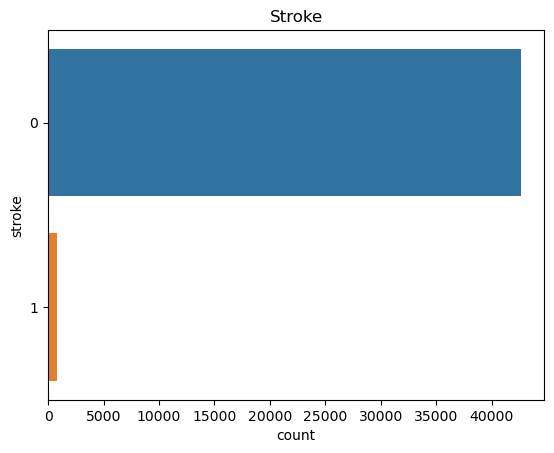

In [88]:
sns.countplot(data=d1,y="stroke")
plt.title("Stroke")
plt.show()

Conclusion: All the models are Overfitted but in this NB is good and it has Class Imbalance

# Class Imbalance

# Under Sampling

# Random

In [89]:
#d1.shape

In [90]:
#d1.stroke.value_counts()

In [91]:
#s_0,s_1=d1.stroke.value_counts()
#s_0,s_1

In [92]:
#t_0=d1[d1.stroke==0]
#t_1=d1[d1.stroke==1]
#t_0.shape,t_1.shape

In [93]:
#s_0_under=t_0.sample(s_1)

In [94]:
#s_0_under.shape,t_1.shape

In [95]:
#s0_1=pd.concat([s_0_under,t_1],axis=0)

In [96]:
#s0_1.head(2)

In [97]:
#s0_1.stroke.value_counts()

In [98]:
#x1=s0_1.iloc[:,0:-1]
#y1=s0_1.iloc[:,-1]

# IMB Learn

In [99]:
#from imblearn.under_sampling import RandomUnderSampler

In [100]:
#d1.stroke.value_counts()

In [101]:
#d_x=d1.iloc[:,0:-1]
#d_y=d1.iloc[:,-1]

In [102]:
#a1=RandomUnderSampler(sampling_strategy="all") 

In [103]:
#x1,y1=a1.fit_resample(d_x,d_y)
#x1.shape,y1.shape

# Near miss

In [104]:
#from imblearn.under_sampling import NearMiss
#nm=NearMiss()

In [105]:
#hr_x=d1.iloc[:,0:-1]
#hr_y=d1.iloc[:,-1]

In [106]:
#x1,y1=nm.fit_resample(hr_x,hr_y)

In [107]:
#x1.shape,y1.shape

# Over Sampling

# Random

In [108]:
#s_0,s_1=d1.stroke.value_counts()
#s_0,s_1

In [109]:
#t_0=d1[d1.stroke==0]
#t_1=d1[d1.stroke==1]
#t_0.shape,t_1.shape

In [110]:
#s_0,s_1

In [111]:
#s_1over=t_1.sample(s_0,replace=True)

In [112]:
#s_1over.head()
#s_1over.shape,t_0.shape

In [113]:
#s1_0=pd.concat([s_1over,t_0],axis=0)
#s1_0.shape

In [114]:
#s1_0.stroke.value_counts()

In [115]:
#x1=s1_0.iloc[:,0:-1]
#y1=s1_0.iloc[:,-1]

# IMB Learn

In [116]:
#x8=d1.iloc[:,0:-1]
#y8=d1.iloc[:,-1]

In [117]:
#from imblearn.over_sampling import RandomOverSampler

In [118]:
#a1=RandomOverSampler(random_state=42)
#x1,y1=a1.fit_resample(x8,y8)

In [119]:
#x1.shape,y1.shape

# Smote

In [120]:
hr_x=d1.iloc[:,0:-1]
hr_y=d1.iloc[:,-1]

In [121]:
hr_y.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [122]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [123]:
x1,y1=smote.fit_resample(hr_x,hr_y)

In [124]:
x1.shape,y1.shape

((85234, 10), (85234,))

In [125]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=100)

In [126]:
x1_train.shape,y1_train.shape,x1_test.shape,y1_test.shape

((68187, 10), (68187,), (17047, 10), (17047,))

In [127]:
d4=pd.concat([x1,y1],axis=1)
d4.head(2)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,2,0
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0


In [128]:
d4.shape

(85234, 11)

# EDA-Exploratory Data Analysis

# Outliers

<Axes: >

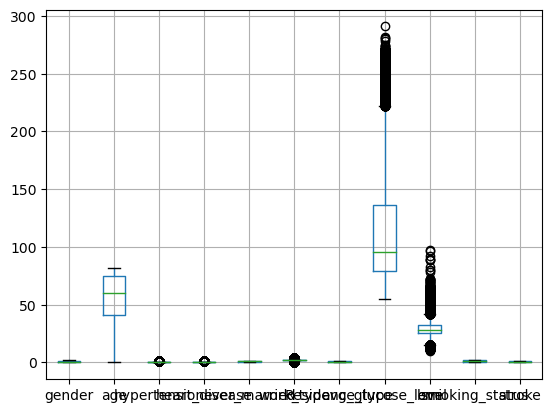

In [129]:
d4.boxplot()

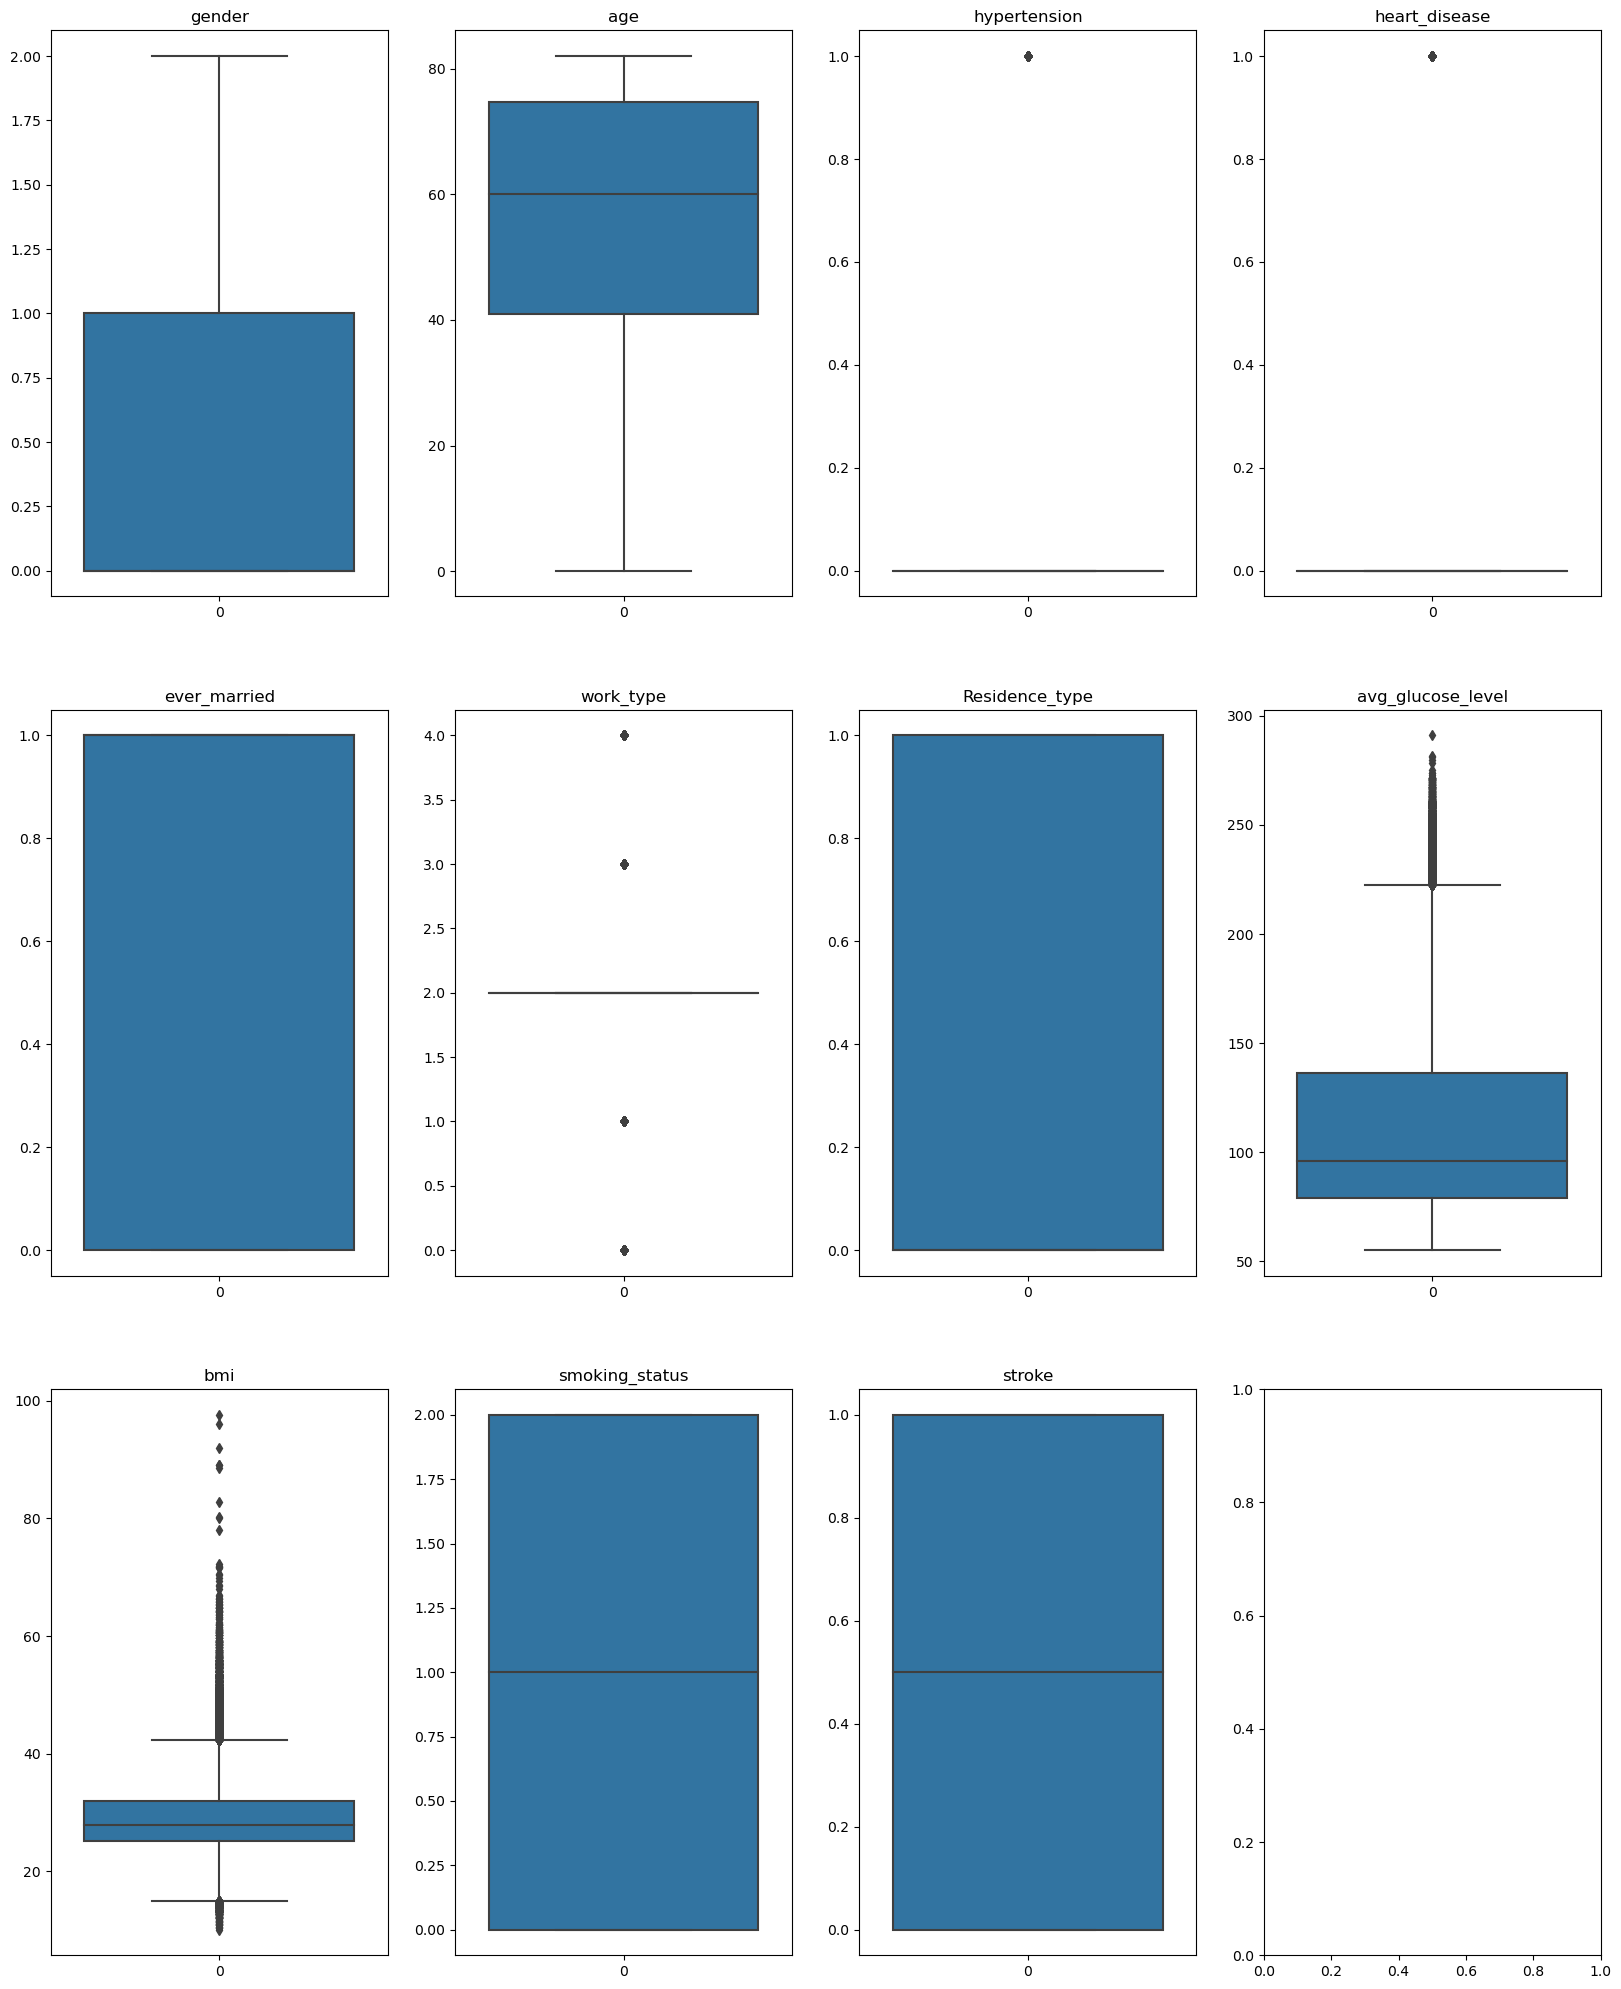

In [130]:
num_cols=d4.columns
fig,ax=plt.subplots(3,4,figsize=(20,25))
index=0
ax=ax.flatten()
for i in d4:
    sns.boxplot(d4[i],ax=ax[index])
    ax[index].set_title(i)
    index+=1
plt.show()

In [131]:
d4.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

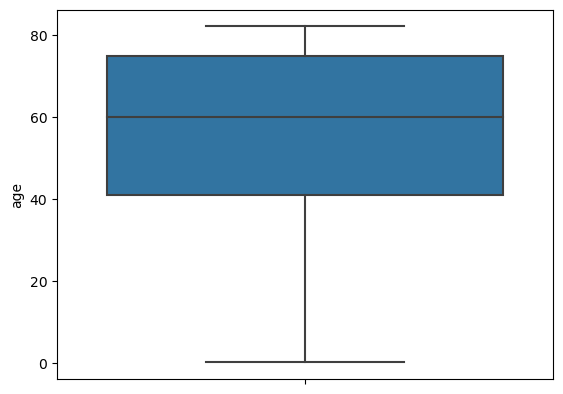

In [132]:
sns.boxplot(data=d4,y="age")
plt.show()

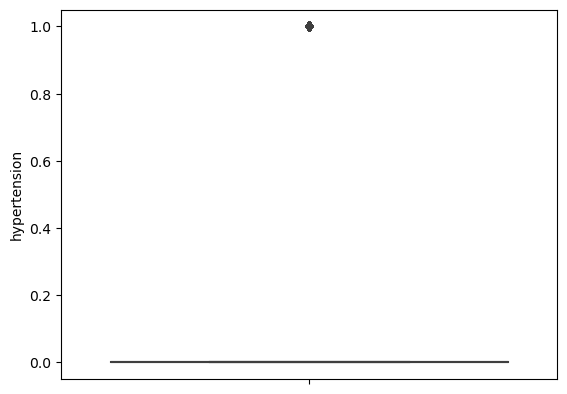

In [133]:
sns.boxplot(data=d4,y="hypertension")
plt.show()

In [134]:
d4.hypertension.value_counts()

0    78240
1     6994
Name: hypertension, dtype: int64

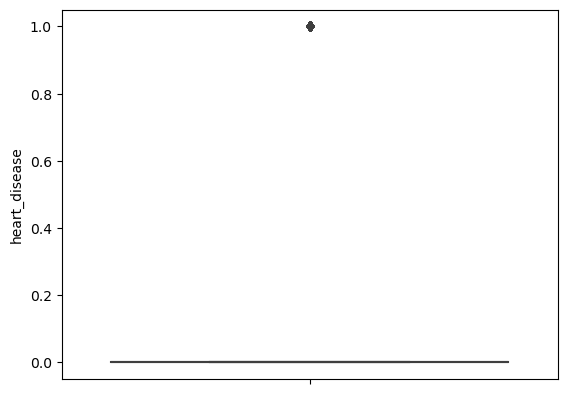

In [135]:
sns.boxplot(data=d4,y="heart_disease")
plt.show()

In [136]:
d4.heart_disease.value_counts()

0    80834
1     4400
Name: heart_disease, dtype: int64

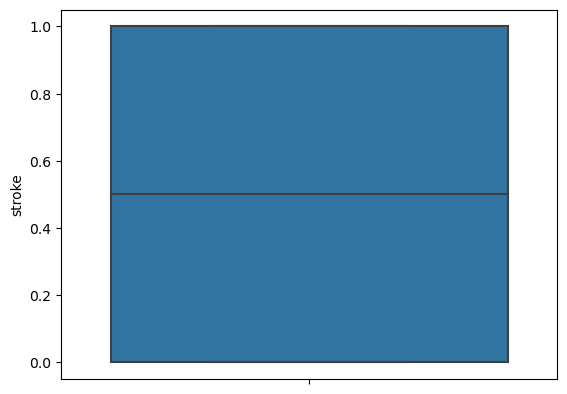

In [137]:
sns.boxplot(data=d4,y="stroke")
plt.show()

In [138]:
d4.stroke.value_counts()

0    42617
1    42617
Name: stroke, dtype: int64

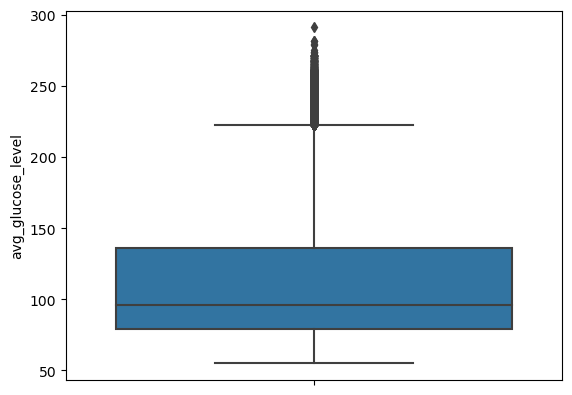

In [139]:
sns.boxplot(data=d4,y="avg_glucose_level")
plt.show()

In [140]:
d4.avg_glucose_level.skew()

1.0963085023472816

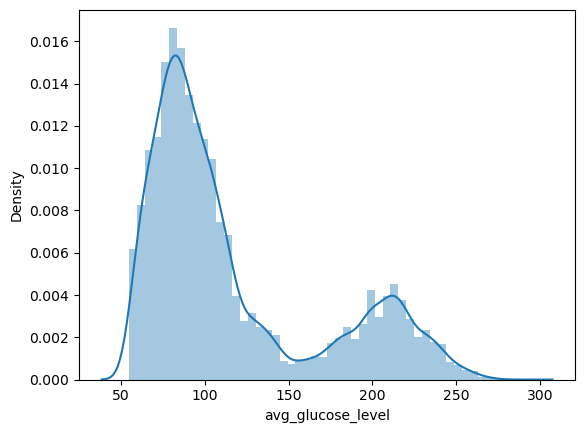

In [141]:
sns.distplot(d4.avg_glucose_level)
plt.show()

<Axes: >

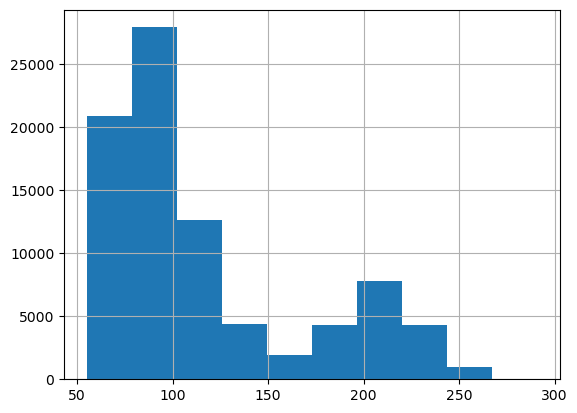

In [142]:
d4.avg_glucose_level.hist()

In [143]:
#IQR=q3-q1
IQR=d4.avg_glucose_level.quantile(0.75)-d4.avg_glucose_level.quantile(0.25)
IQR

57.37619950836836

In [144]:
ub=d4.avg_glucose_level.quantile(0.75)+3*IQR
lb=d4.avg_glucose_level.quantile(0.25)-3*IQR
print(ub,lb)

308.43479803347344 -93.19859852510507


In [145]:
d4.loc[d4["avg_glucose_level"]>311.22547528659527  ,"avg_glucose_level"]=311.22547528659527  

In [146]:
d4.avg_glucose_level.skew()

1.0963085023472816

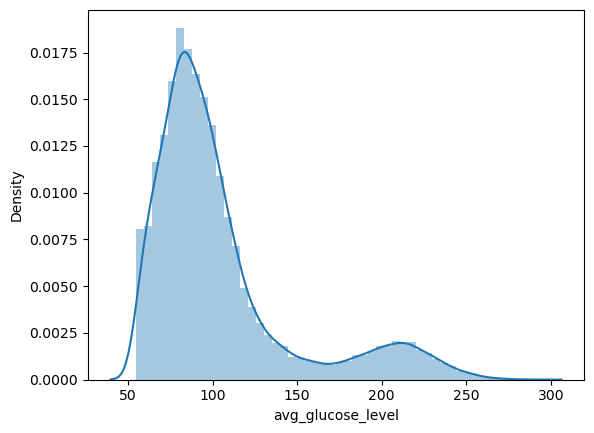

In [147]:
sns.distplot(d1.avg_glucose_level)
plt.show()

<Axes: >

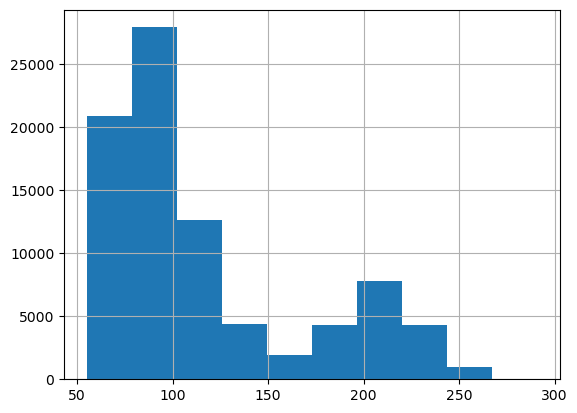

In [148]:
d4.avg_glucose_level.hist()

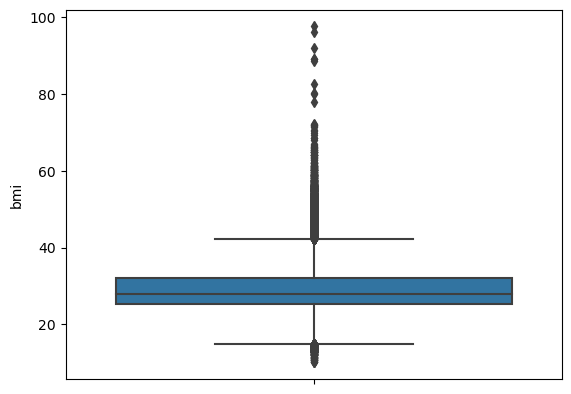

In [149]:
sns.boxplot(data=d4,y="bmi")
plt.show()

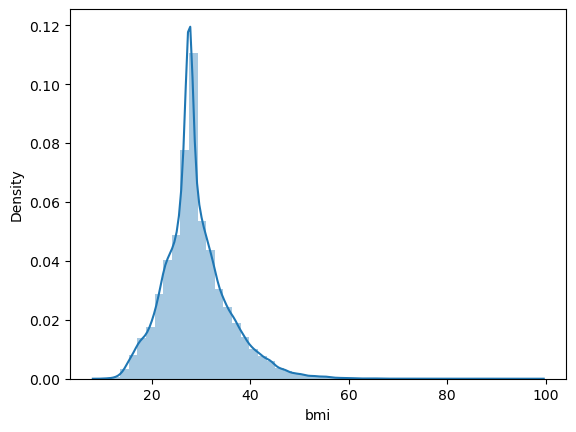

In [150]:
sns.distplot(d4.bmi)
plt.show()

<Axes: >

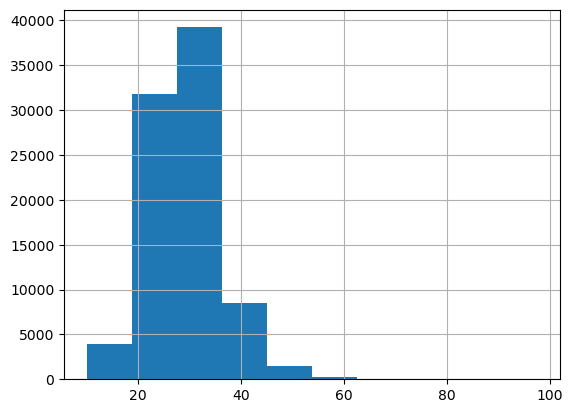

In [151]:
d4.bmi.hist()

In [152]:
d4.bmi.skew()

0.947947690460793

In [153]:
#IQR=q3-q1
IQR1=d4.bmi.quantile(0.75)-d4.bmi.quantile(0.25)
IQR1

6.817779071586198

In [154]:
#find the limits
ub1=d4.bmi.quantile(0.75)+3*IQR1
lb1=d4.bmi.quantile(0.25)-3*IQR1
print(ub1,lb1)

52.471116286344795 4.746662785241405


In [155]:
d4.loc[d4["bmi"]>52.33957424877532,"bmi"]=52.33957424877532  
d4.loc[d4["bmi"]<4.880567668299577, "bmi"]=4.880567668299577

In [156]:
d4.bmi.skew()

0.7338508872687483

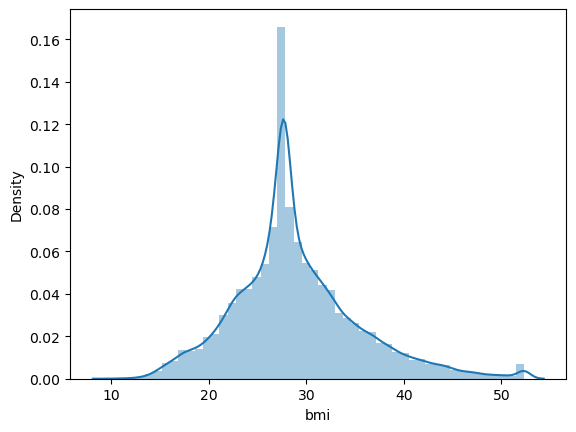

In [157]:
sns.distplot(d4.bmi)
plt.show()

<Axes: >

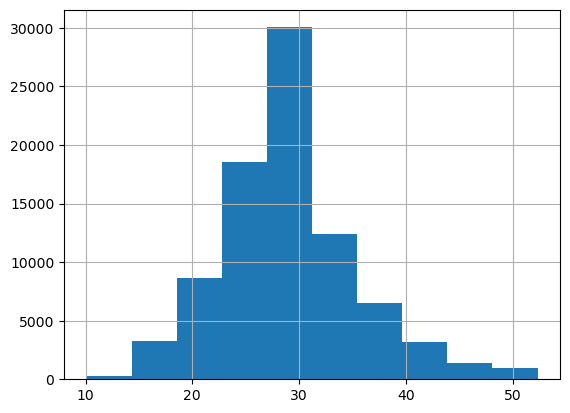

In [158]:
d4.bmi.hist()

# skewness

In [159]:
d4.skew()

gender               0.799150
age                 -0.767399
hypertension         3.045726
heart_disease        4.052946
ever_married        -1.046653
work_type           -0.311322
Residence_type       0.477271
avg_glucose_level    1.096309
bmi                  0.733851
smoking_status      -0.043094
stroke               0.000000
dtype: float64

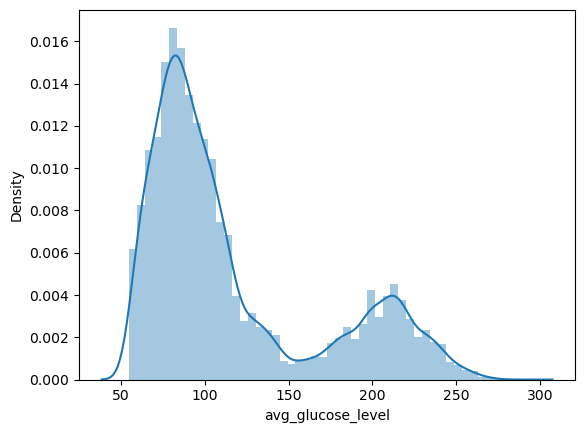

In [160]:
sns.distplot(d4.avg_glucose_level)
plt.show()                

In [161]:
d4["avg_glucose_level"]=np.sqrt(d4["avg_glucose_level"])

In [162]:
d4.avg_glucose_level.skew()

0.8809787874464103

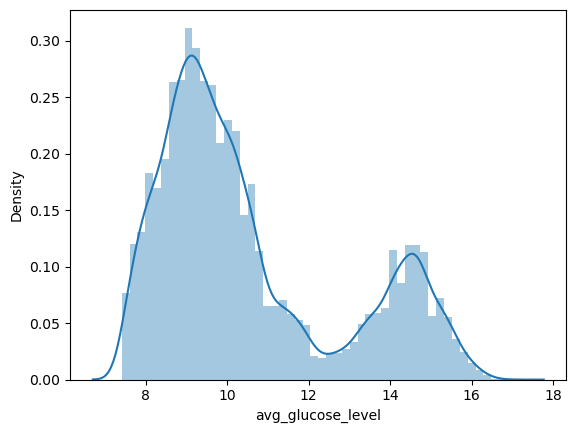

In [163]:
sns.distplot(d4.avg_glucose_level)
plt.show()

# Model II

# Logistic Regression

In [164]:
lg.fit(x1_train,y1_train)

LogisticRegression()

In [165]:
lgp2=lg.predict(x1_test)

In [166]:
lgc2=confusion_matrix(y1_test,lgp2)
lgc2

array([[6640, 1829],
       [1552, 7026]], dtype=int64)

In [167]:
lga2=lgc2.diagonal().sum()/lgc2.sum()*100
lga2

80.16659822842729

In [168]:
print(classification_report(y1_test,lgp2))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      8469
           1       0.79      0.82      0.81      8578

    accuracy                           0.80     17047
   macro avg       0.80      0.80      0.80     17047
weighted avg       0.80      0.80      0.80     17047



In [169]:
Lg_f2=f1_score(y1_test,lgp2)
Lg_p2=precision_score(y1_test,lgp2)
Lg_r2=recall_score(y1_test,lgp2)
print(Lg_f2,Lg_p2,Lg_r2)

0.8060574771984168 0.7934500282326369 0.8190720447656796


# Decision Tree

In [170]:
dt.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [171]:
dtp2=dt.predict(x1_test)

In [172]:
prob=dt.predict_proba(x1_test)

In [173]:
df=pd.DataFrame(prob)
df

,0,1
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
17042,0.0,1.0
17043,0.0,1.0
17044,0.0,1.0
17045,1.0,0.0


Text(0.5, 1.0, 'Confusion\xa0Matrix')

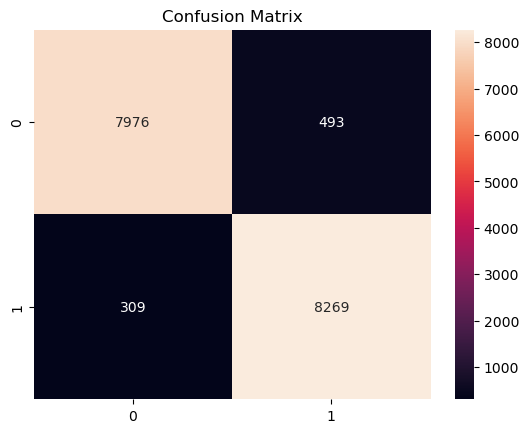

In [174]:
dtc2=confusion_matrix(y1_test,dtp2)
dtc2
sns.heatmap(dtc2,annot=True,fmt='d')
plt.title('Confusion Matrix')

In [175]:
dta2=dtc2.diagonal().sum()/dtc2.sum()*100
dta2

95.29535988737021

In [176]:
print(classification_report(y1_test,dtp2))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8469
           1       0.94      0.96      0.95      8578

    accuracy                           0.95     17047
   macro avg       0.95      0.95      0.95     17047
weighted avg       0.95      0.95      0.95     17047



In [177]:
dt_f2=f1_score(y1_test,dtp2)
dt_p2=precision_score(y1_test,dtp2)
dt_r2=recall_score(y1_test,dtp2)
print(dt_f2,dt_p2,dt_r2)

0.953748558246828 0.9437343072357909 0.9639776171601772


# Random Forest

In [178]:
rf.fit(x1_train,y1_train)

RandomForestClassifier()

In [179]:
rfp2=rf.predict(x1_test)

In [180]:
rfc2=confusion_matrix(y1_test,rfp2)
rfc2

array([[8140,  329],
       [ 155, 8423]], dtype=int64)

In [181]:
rfa2=rfc2.diagonal().sum()/rfc2.sum()*100
rfa2

97.16079075497154

In [182]:
print(classification_report(y1_test,rfp2))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      8469
           1       0.96      0.98      0.97      8578

    accuracy                           0.97     17047
   macro avg       0.97      0.97      0.97     17047
weighted avg       0.97      0.97      0.97     17047



In [183]:
rf_f2=f1_score(y1_test,rfp2)
rf_p2=precision_score(y1_test,rfp2)
rf_r2=recall_score(y1_test,rfp2)
print(rf_f2,rf_p2,rf_r2)

0.972071552221581 0.962408592321755 0.9819305199347167


# KNN 

In [184]:
knn.fit(x1_train,y1_train)

KNeighborsClassifier()

In [185]:
knnp2=knn.predict(x1_test)

In [186]:
knnc2=confusion_matrix(y1_test,knnp2)
knnc2

array([[7174, 1295],
       [  45, 8533]], dtype=int64)

In [187]:
knna2=knnc2.diagonal().sum()/knnc2.sum()*100
knna2

92.13937936293776

In [188]:
print(classification_report(y1_test,knnp2))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      8469
           1       0.87      0.99      0.93      8578

    accuracy                           0.92     17047
   macro avg       0.93      0.92      0.92     17047
weighted avg       0.93      0.92      0.92     17047



In [189]:
knn_f2=f1_score(y1_test,knnp2)
knn_p2=precision_score(y1_test,knnp2)
knn_r2=recall_score(y1_test,knnp2)
print(knn_f2,knn_p2,knn_r2)

0.9271976529392588 0.8682336182336182 0.9947540219165306


# XGB

In [190]:
xgb.fit(x1_train,y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [191]:
xgbp2=xgb.predict(x1_test)

In [192]:
xgbc2=confusion_matrix(y1_test,xgbp2)
xgbc2

array([[8271,  198],
       [ 186, 8392]], dtype=int64)

In [193]:
xgba2=xgbc2.diagonal().sum()/xgbc2.sum()*100
xgba2

97.74740423534934

In [194]:
print(classification_report(y1_test,xgbp2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8469
           1       0.98      0.98      0.98      8578

    accuracy                           0.98     17047
   macro avg       0.98      0.98      0.98     17047
weighted avg       0.98      0.98      0.98     17047



In [195]:
xgb_f2=f1_score(y1_test,xgbp2)
xgb_p2=precision_score(y1_test,xgbp2)
xgb_r2=recall_score(y1_test,xgbp2)
print(xgb_f2,xgb_p2,xgb_r2)

0.9776328052190121 0.9769499417927823 0.9783166239216601


# Naive Bayes

In [196]:
nb.fit(x1_train,y1_train)

MultinomialNB()

In [197]:
nbp2=nb.predict(x1_test)

In [198]:
nbc2=confusion_matrix(y1_test,nbp2)
nbc2

array([[5772, 2697],
       [1745, 6833]], dtype=int64)

In [199]:
nba2=nbc2.diagonal().sum()/nbc2.sum()*100
nba2

73.94262920161904

In [200]:
print (classification_report(y1_test,nbp2))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      8469
           1       0.72      0.80      0.75      8578

    accuracy                           0.74     17047
   macro avg       0.74      0.74      0.74     17047
weighted avg       0.74      0.74      0.74     17047



In [201]:
nb_f2=f1_score(y1_test,nbp2)
nb_p2=precision_score(y1_test,nbp2)
nb_r2=recall_score(y1_test,nbp2)
print(nb_f2,nb_p2,nb_r2)

0.7546940578749723 0.7169989506820567 0.7965726276521333


In [202]:
A1=["Logistic","DT","RF","KNN","XGB","NB"]
A2=[lga2,dta2,rfa2,knna2,xgba2,nba2]
A3=[Lg_p2,dt_p2,rf_p2,knn_p2,xgb_p2,nb_p2]
A4=[Lg_r2,dt_r2,rf_r2,knn_r2,xgb_r2,nb_r2]
A5=[Lg_f2,dt_f2,rf_f2,knn_f2,xgb_f2,nb_f2]

In [203]:
final_df2=pd.DataFrame({"Model":A1,"Accuracy":A2,"Precision":A3,"recall":A4,"f1_score":A5})
final_df2

,Model,Accuracy,Precision,recall,f1_score
0,Logistic,80.166598,0.793450,0.819072,0.806057
1,DT,95.295360,0.943734,0.963978,0.953749
2,RF,97.160791,0.962409,0.981931,0.972072
3,KNN,92.139379,0.868234,0.994754,0.927198
4,XGB,97.747404,0.976950,0.978317,0.977633
5,NB,73.942629,0.716999,0.796573,0.754694


Model 2 - Conclusion: DT has good accuracy, precision, recall, f1-score compared to other models but the Tn is high

# visualization

In [204]:
d1_n=d1.corr()
d1_n

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027903,0.023709,0.082061,-0.031351,0.063739,0.001508,0.035465,-0.022387,0.027844,0.011198
age,-0.027903,1.000000,0.272169,0.250188,0.693070,-0.366664,0.001299,0.237627,0.350231,-0.323793,0.156049
hypertension,0.023709,0.272169,1.000000,0.119777,0.176575,-0.060800,-0.003124,0.160211,0.151361,-0.099480,0.075332
heart_disease,0.082061,0.250188,0.119777,1.000000,0.128833,-0.021835,-0.002743,0.146938,0.051753,-0.061878,0.113763
ever_married,-0.031351,0.693070,0.176575,0.128833,1.000000,-0.359848,0.004422,0.153607,0.336226,-0.242872,0.071920
work_type,0.063739,-0.366664,-0.060800,-0.021835,-0.359848,1.000000,-0.003473,-0.059303,-0.318146,0.208403,-0.010800
Residence_type,0.001508,0.001299,-0.003124,-0.002743,0.004422,-0.003473,1.000000,0.000014,-0.003789,0.004326,0.002247
avg_glucose_level,0.035465,0.237627,0.160211,0.146938,0.153607,-0.059303,0.000014,1.000000,0.181899,-0.084546,0.078917
bmi,-0.022387,0.350231,0.151361,0.051753,0.336226,-0.318146,-0.003789,0.181899,1.000000,-0.197658,0.016073
smoking_status,0.027844,-0.323793,-0.099480,-0.061878,-0.242872,0.208403,0.004326,-0.084546,-0.197658,1.000000,-0.038786


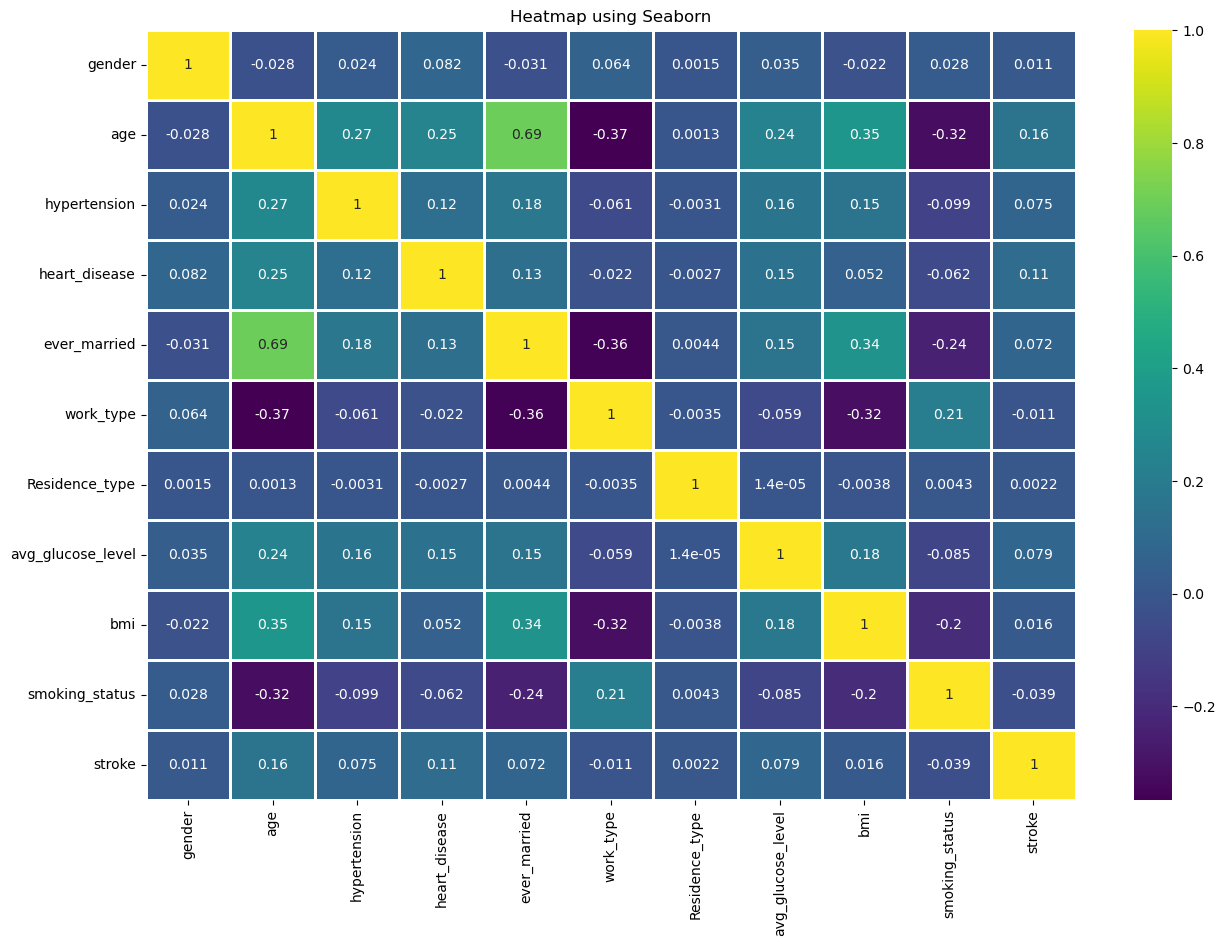

In [205]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(d1_n,linewidth=2,annot=True,cmap=plt.cm.viridis)
plt.title("Heatmap using Seaborn")
plt.show()

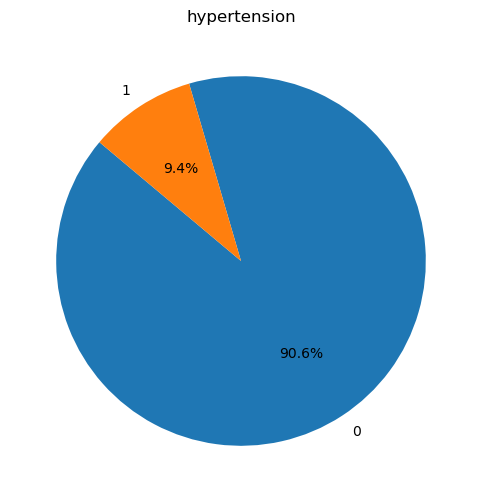

In [266]:
# Group the data by 'own_goal' and count the occurrences
hypertension=d1['hypertension'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(hypertension, labels=hypertension.index, autopct='%1.1f%%', startangle=140)
plt.title('hypertension')
plt.show()

In [207]:
d4.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

# Feature Selection

In [208]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [209]:
rfe=RFE(dtree,n_features_to_select=8)
rfe.fit(d4.iloc[:,0:-1],d4.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)

In [210]:
rfe.support_

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True])

In [211]:
f1=pd.DataFrame({"feature":list(rfe.support_),"col":list(d4.iloc[:,0:-1].columns)})

In [212]:
f1

,feature,col
0,True,gender
1,True,age
2,False,hypertension
3,False,heart_disease
4,True,ever_married
5,True,work_type
6,True,Residence_type
7,True,avg_glucose_level
8,True,bmi
9,True,smoking_status


In [213]:
d4=d4.drop(["hypertension","heart_disease"],axis=1)
d4

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.000000,0,4,0,9.752948,18.000000,2,0
1,1,58.000000,1,2,1,9.378699,39.200000,1,0
2,0,8.000000,0,2,1,10.530432,17.600000,2,0
3,0,70.000000,1,2,0,8.309031,35.900000,0,0
4,1,14.000000,0,1,0,12.699606,19.100000,2,0
...,...,...,...,...,...,...,...,...,...
85229,0,56.249733,1,2,0,14.549828,25.820651,0,1
85230,0,56.877222,0,2,1,10.092415,28.611148,1,1
85231,0,81.717273,1,2,1,9.192704,26.247637,0,1
85232,1,78.370521,1,2,0,10.752079,27.322313,0,1


In [214]:
x2=d4.iloc[: ,0:-1]
y2=d4.iloc[:,-1]

In [215]:
x_train5,x_test5,y_train5,y_test5=train_test_split(x2,y2,test_size=0.2,random_state=101)
x_train5.shape,x_test5.shape,y_train5.shape,y_test5.shape

((68187, 8), (17047, 8), (68187,), (17047,))

# Logistic Regression

In [216]:
lg.fit(x_train5,y_train5)

LogisticRegression()

In [217]:
lgp3=lg.predict(x_test5)

In [218]:
lgc3=confusion_matrix(y_test5,lgp3)
lgc3

array([[6544, 1960],
       [1524, 7019]], dtype=int64)

In [219]:
lga3=lgc3.diagonal().sum()/lgc3.sum()*100
lga3

79.56238634363818

In [220]:
print (classification_report(y_test5,lgp3))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      8504
           1       0.78      0.82      0.80      8543

    accuracy                           0.80     17047
   macro avg       0.80      0.80      0.80     17047
weighted avg       0.80      0.80      0.80     17047



In [221]:
lg_f3=f1_score(y_test5,lgp3)
lg_p3=precision_score(y_test5,lgp3)
lg_r3=recall_score(y_test5,lgp3)
print(lg_f3,lg_p3,lg_r3)

0.8011642506563178 0.7817128856220069 0.8216083343087909


# Decision Tree

In [222]:
dt.fit(x_train5,y_train5)

DecisionTreeClassifier()

In [223]:
dtp3=dt.predict(x_test5)

Text(0.5, 1.0, 'Confusion\xa0Matrix')

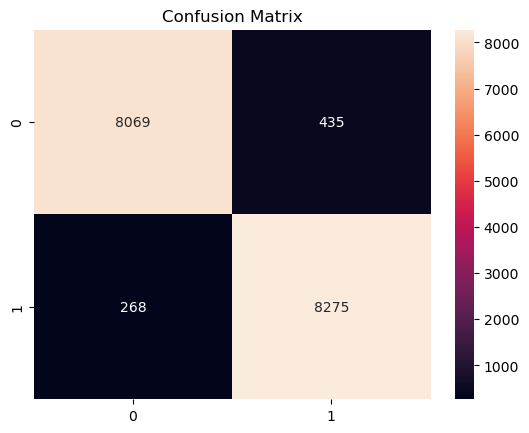

In [224]:
dtc3=confusion_matrix(y_test5,dtp3)
dtc3
sns.heatmap(dtc3,annot=True,fmt='d')
plt.title('Confusion Matrix')

In [225]:
dta3=dtc3.diagonal().sum()/dtc3.sum()*100
dta3

95.87610723294421

In [226]:
print (classification_report(y_test5,dtp3))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8504
           1       0.95      0.97      0.96      8543

    accuracy                           0.96     17047
   macro avg       0.96      0.96      0.96     17047
weighted avg       0.96      0.96      0.96     17047



In [227]:
dt_f3=f1_score(y_test5,dtp3)
dt_p3=precision_score(y_test5,dtp3)
dt_r3=recall_score(y_test5,dtp3)
print(dt_f3,dt_p3,dt_r3)

0.9592534631658263 0.9500574052812859 0.9686292871356667


# Random forest

In [228]:
rf.fit(x_train5,y_train5)

RandomForestClassifier()

In [229]:
rfp3=rf.predict(x_test5)

In [230]:
rfc3=confusion_matrix(y_test5,rfp3)
rfc3

array([[8182,  322],
       [ 161, 8382]], dtype=int64)

In [231]:
rfa3=rfc3.diagonal().sum()/rfc3.sum()*100
rfa3

97.16665688977533

In [232]:
print (classification_report(y_test5,rfp3))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      8504
           1       0.96      0.98      0.97      8543

    accuracy                           0.97     17047
   macro avg       0.97      0.97      0.97     17047
weighted avg       0.97      0.97      0.97     17047



In [233]:
rf_f3=f1_score(y_test5,rfp3)
rf_p3=precision_score(y_test5,rfp3)
rf_r3=recall_score(y_test5,rfp3)
print(rf_f3,rf_p3,rf_r3)

0.9719951295877545 0.9630055147058824 0.9811541613016505


# KNN

In [234]:
knn.fit(x_train5,y_train5)

KNeighborsClassifier()

In [235]:
knnp3=knn.predict(x_test5)

In [236]:
knnc3=confusion_matrix(y_test5,knnp3)
knnc3

array([[7051, 1453],
       [ 152, 8391]], dtype=int64)

In [237]:
knna3=knnc3.diagonal().sum()/knnc3.sum()*100
knna3

90.58485363993665

In [238]:
print (classification_report(y_test5,knnp3))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8504
           1       0.85      0.98      0.91      8543

    accuracy                           0.91     17047
   macro avg       0.92      0.91      0.91     17047
weighted avg       0.92      0.91      0.91     17047



In [239]:
knn_f3=f1_score(y_test5,knnp3)
knn_p3=precision_score(y_test5,knnp3)
knn_r3=recall_score(y_test5,knnp3)
print(knn_f3,knn_p3,knn_r3)

0.912710066895089 0.8523973994311256 0.9822076553903781


# XGB

In [240]:
xgb.fit(x_train5,y_train5)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [241]:
xgbp3=xgb.predict(x_test5)

In [242]:
xgbc3=confusion_matrix(y_test5,xgbp3)
xgbc3

array([[8322,  182],
       [ 199, 8344]], dtype=int64)

In [243]:
xgba3=xgbc3.diagonal().sum()/xgbc3.sum()*100
xgba3

97.76500263976065

In [244]:
print (classification_report(y_test5,xgbp3))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8504
           1       0.98      0.98      0.98      8543

    accuracy                           0.98     17047
   macro avg       0.98      0.98      0.98     17047
weighted avg       0.98      0.98      0.98     17047



In [245]:
xgb_f3=f1_score(y_test5,xgbp3)
xgb_p3=precision_score(y_test5,xgbp3)
xgb_r3=recall_score(y_test5,xgbp3)
print(xgb_f3,xgb_p3,xgb_r3)

0.9776788329720546 0.9786535303776683 0.976706075149245


# NB

In [246]:
nb.fit(x_train5,y_train5)

MultinomialNB()

In [247]:
nbp3=nb.predict(x_test5)

In [248]:
nbc3=confusion_matrix(y_test5,nbp3)
nbc3

array([[5933, 2571],
       [1355, 7188]], dtype=int64)

In [249]:
nba3=nbc3.diagonal().sum()/nbc3.sum()*100
nba3

76.9695547603684

In [250]:
print (classification_report(y_test5,nbp3))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75      8504
           1       0.74      0.84      0.79      8543

    accuracy                           0.77     17047
   macro avg       0.78      0.77      0.77     17047
weighted avg       0.78      0.77      0.77     17047



In [251]:
nb_f3=f1_score(y_test5,nbp3)
nb_p3=precision_score(y_test5,nbp3)
nb_r3=recall_score(y_test5,nbp3)
print(nb_f3,nb_p3,nb_r3)

0.78548792481696 0.736550876114356 0.8413906121971204


In [252]:
B1=["Logistic","DT","RF","KNN","XGB","NB"]
B2=[lga3,dta3,rfa3,knna3,xgba3,nba3]
B3=[lg_p3,dt_p3,rf_p3,knn_p3,xgb_p3,nb_p3]
B4=[lg_r3,dt_r3,rf_r3,knn_r3,xgb_r3,nb_r3]
B5=[lg_f3,dt_f3,rf_f3,knn_f3,xgb_f3,nb_f3]

In [253]:
final_df3=pd.DataFrame({"Model":B1,"Accuracy":B2,"Precision":B3,"recall":B4,"f1_score":B5})
final_df3

,Model,Accuracy,Precision,recall,f1_score
0,Logistic,79.562386,0.781713,0.821608,0.801164
1,DT,95.876107,0.950057,0.968629,0.959253
2,RF,97.166657,0.963006,0.981154,0.971995
3,KNN,90.584854,0.852397,0.982208,0.912710
4,XGB,97.765003,0.978654,0.976706,0.977679
5,NB,76.969555,0.736551,0.841391,0.785488


In [254]:
Model=pd.concat([final_df,final_df2,final_df3],keys=['Model1','Model2','Model3'])
Model

Model   Accuracy  Precision    recall  f1_score
Model1 0  Logistic  98.271889   0.000000  0.000000  0.000000
       1        DT  96.186636   0.031088  0.040000  0.034985
       2        RF  98.248848   0.000000  0.000000  0.000000
       3       KNN  98.214286   0.000000  0.000000  0.000000
       4       ADB  96.255760   0.037037  0.046667  0.041298
       5       XGB  98.191244   0.000000  0.000000  0.000000
       6       SVM  98.271889   0.000000  0.000000  0.000000
       7        NB  86.094470   0.055509  0.440000  0.098581
Model2 0  Logistic  80.166598   0.793450  0.819072  0.806057
       1        DT  95.295360   0.943734  0.963978  0.953749
       2        RF  97.160791   0.962409  0.981931  0.972072
       3       KNN  92.139379   0.868234  0.994754  0.927198
       4       XGB  97.747404   0.976950  0.978317  0.977633
       5        NB  73.942629   0.716999  0.796573  0.754694
Model3 0  Logistic  79.562386   0.781713  0.821608  0.801164
       1        DT  95.876107   0.950057  0.968629  0.959253
       2        RF  97.166657   0.963006  0.981154  0.971995
       3       KNN  90.584854   0.852397  0.982208  0.912710
       4       XGB  97.765003   0.978654  0.976706  0.977679
       5        NB  76.969555   0.736551  0.841391  0.785488

# PRC curve

In [255]:
#pRC curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [256]:
precision,recall,threshold=precision_recall_curve(y1_test,df.iloc[:,1])

In [257]:
precision

array([0.50319704, 0.94373431, 1.        ])

In [258]:
recall

array([1.        , 0.96397762, 0.        ])

In [259]:
threshold

array([0., 1.])

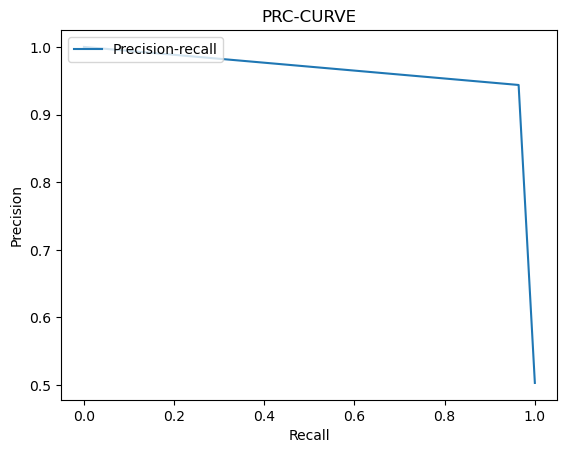

In [260]:
plt.plot(recall,precision,label="Precision-recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("PRC-CURVE")
plt.show()